In [2]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Doc2Vec
import matplotlib.pyplot as plt

In [3]:
df_label = pd.read_csv("../data/arc-merge.csv")

In [4]:
# path: offline-run-20230913_142136-spx3mjmw (0.99461/0.72745)
# path with non-intrinsic geometric properties: offline-run-20230913_142648-ui5pydcv (0.99625/0.75882)
wandb_path = "offline-run-20230913_142136-spx3mjmw"
embedding_path = os.path.join("../experiments/workflow/wandb", wandb_path, "tmp/embedding_dv.csv")
df_emb = pd.read_csv(embedding_path)

In [5]:
model = Doc2Vec.load(os.path.join("../experiments/workflow/wandb", wandb_path, "tmp/embedding_model.pt"))

In [6]:
emb_vec = df_emb.values[:, 1:]
emb_vec.shape

(22035, 1000)

In [6]:
projector = PCA(n_components=2, random_state=1414)
emb_2d = projector.fit_transform(emb_vec)

In [86]:
clustering = DBSCAN(eps=0.7, min_samples=5, leaf_size=50, n_jobs=-1).fit(emb_vec)
clusters = clustering.labels_

In [87]:
np.unique(clusters)

array([-1,  0])

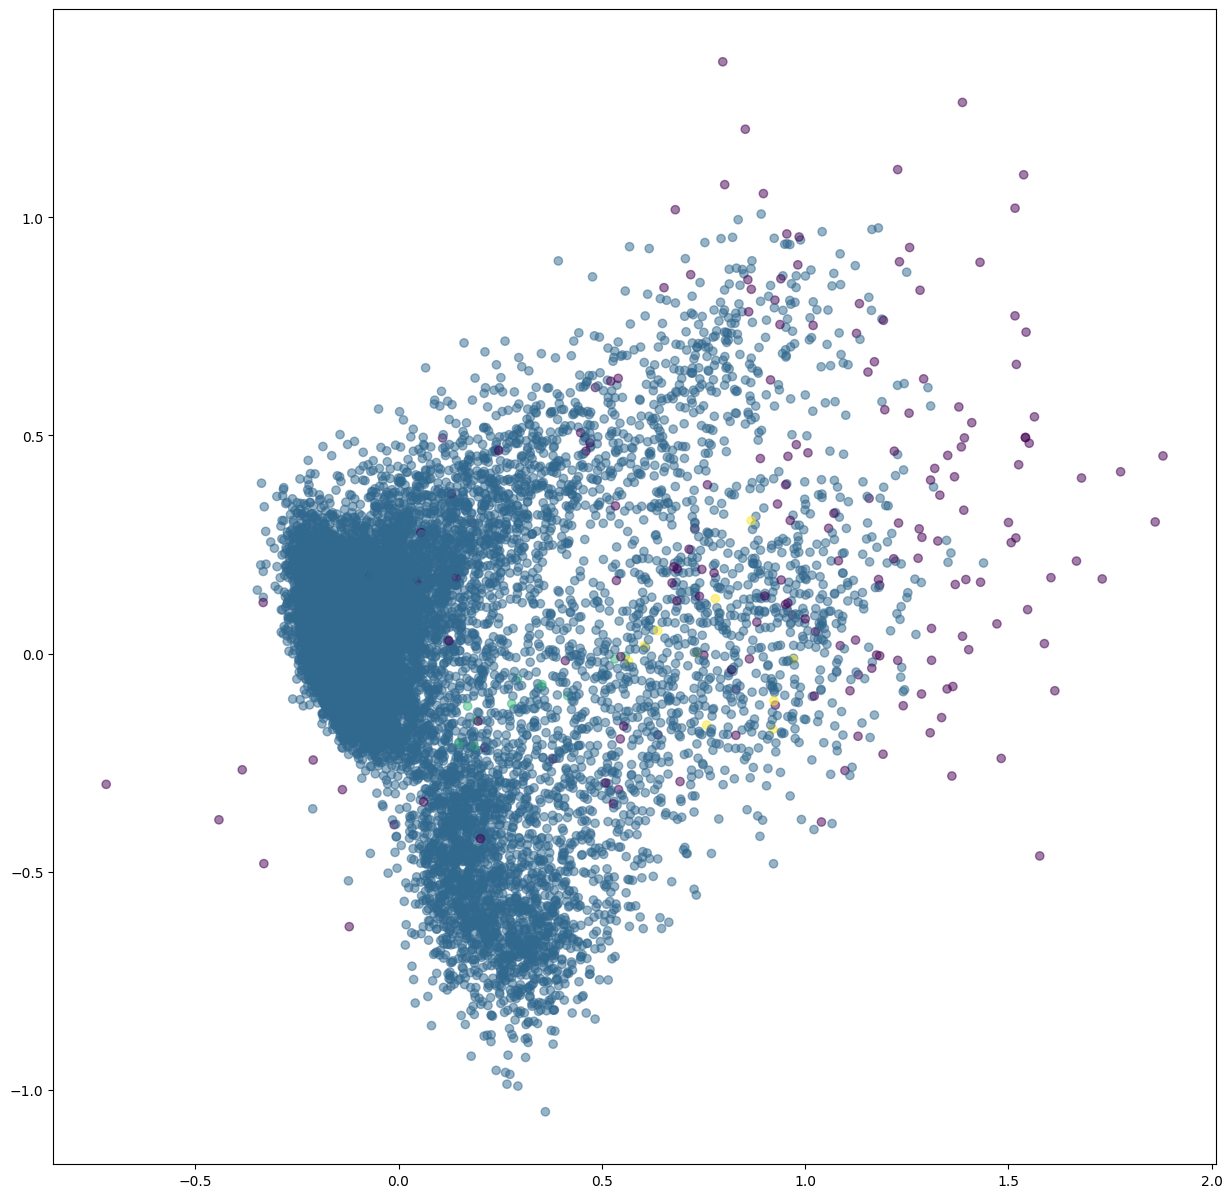

In [73]:
plt.figure(figsize=(15,15))
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=clusters, alpha=.5)

In [30]:
df_label

,Unnamed: 0,Name,UC_volume,Density,ASA,vASA,gASA,NASA,gNASA,vNASA,...,outputs.landfill_gas_vpsa_wt%_working_capacity-,outputs.landfill_gas_vpsa_selectivity-,outputs.landfill_gas_vpsa_purity-,outputs.methane_storage_psa_uptake-mmol/g,outputs.methane_storage_psa_working_capacity-mmol/g,outputs.methane_storage_psa_v/v_uptake-,outputs.methane_storage_psa_v/v_working_capacity-,outputs.methane_storage_psa_wt%_uptake-,outputs.methane_storage_psa_wt%_working_capacity-,info.density
0,10,DB0-m29_o99_o470_f0_pts.sym.128.cif,2552.97,0.754924,419.589,1643.53,2177.08,0.164038,0.642539,0.851131,...,19.796875,4.804543,0.756348,10.664062,5.898438,180.375,99.8125,17.062500,9.437500,0.754918
1,16,DB0-m29_o99_o52_f0_pts.sym.17.cif,2911.66,0.595505,587.477,2017.67,3388.17,0.000000,0.000000,0.000000,...,17.234375,4.625138,0.747070,15.062500,11.742188,201.000,156.7500,24.093750,18.781250,0.595504
2,20,DB0-m29_o96_o110_f0_pts.sym.44.cif,4129.18,0.575417,811.226,1964.62,3414.25,0.000000,0.000000,0.000000,...,23.953125,3.618935,0.710449,18.968750,13.070312,244.750,168.6250,30.359375,20.921875,0.575409
3,50,DB0-m3_o11_o22_f0_pcu.sym.15.cif,1192.90,0.861850,227.635,1908.24,2214.12,0.000000,0.000000,0.000000,...,17.875000,5.171379,0.769531,10.390625,6.988281,200.750,135.0000,16.625000,11.179688,0.861901
4,96,DB0-m3_o11_o22_f0_nbo.sym.66.cif,5336.02,0.435533,1032.860,1935.63,4444.28,0.000000,0.000000,0.000000,...,8.687500,2.678724,0.640137,19.531250,17.328125,190.625,169.0000,31.250000,27.718750,0.435567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22030,521155,DB0-m29_o97_o148_f0_pts.sym.68.cif,2373.75,0.692076,507.035,2136.01,3086.38,0.000000,0.000000,0.000000,...,23.937500,3.656125,0.706055,15.390625,8.765625,238.625,135.8750,24.625000,14.023438,0.692070
22031,521163,DB0-m29_o89_o500_f0_pts.sym.44.cif,1938.47,0.787512,321.116,1656.54,2103.51,0.000000,0.000000,0.000000,...,21.609375,4.883972,0.764160,10.578125,5.851562,186.625,103.2500,16.921875,9.359375,0.787505
22032,521194,DB0-m29_o96_o420_f0_pts.sym.90.cif,3732.99,0.547607,806.673,2160.93,3946.13,0.000000,0.000000,0.000000,...,19.703125,2.992954,0.669922,19.968750,14.929688,245.000,183.2500,31.937500,23.890625,0.547601
22033,521260,DB0-m29_o90_o530_f0_pts.sym.68.cif,3786.46,0.622015,831.055,2194.81,3528.54,0.000000,0.000000,0.000000,...,14.250000,2.828812,0.655273,16.171875,12.085938,225.500,168.5000,25.875000,19.343750,0.622009


## Normalize the embedding

In [33]:
emb_vec_norm = normalize(emb_vec)
emb_vec_norm.shape

(22035, 1000)

In [36]:
emb_2d_norm = projector.fit_transform(emb_vec_norm)

In [178]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1414, n_jobs=-1)
emb_2d_norm = tsne.fit_transform(emb_vec_norm)

In [445]:
clustering_norm = DBSCAN(eps=0.3, min_samples=5, leaf_size=50, n_jobs=-1).fit(emb_vec_norm)
clusters_norm = clustering_norm.labels_

In [446]:
indices = clustering_norm.core_sample_indices_

In [447]:
len(clustering_norm.core_sample_indices_)

21722

In [448]:
np.unique(clusters_norm)

array([-1,  0,  1,  2,  3,  4])

In [471]:
Counter(clusters_norm)

Counter({0: 21901, -1: 102, 1: 5, 2: 7, 3: 10, 4: 10})

In [475]:
indice_cls = [i for i, cls in enumerate(clusters_norm) if cls in [0, 1,2,3,4]]

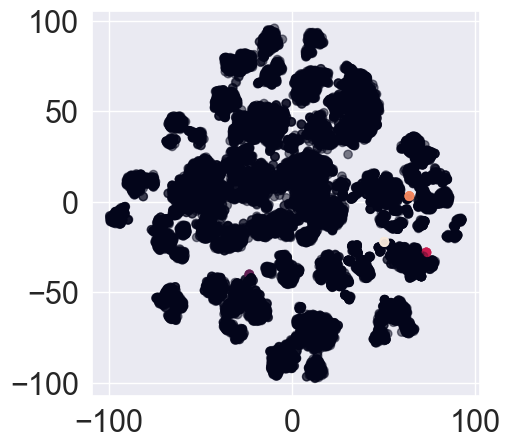

In [476]:
plt.figure(figsize=(5,5))
plt.scatter(emb_2d_norm[indice_cls,0], emb_2d_norm[indice_cls,1], c=clusters_norm[indice_cls], alpha=.5)

# Link cluster with KPIs

In [7]:
df_emb.rename(columns={"type": "info.name"}, inplace=True)

In [8]:
df_emb["class"] = clusters_norm

NameError: name 'clusters_norm' is not defined

In [462]:
df_emb_sub = df_emb[["info.name", "class"]]

In [9]:
df_merge = df_label.merge(df_emb_sub, on="info.name")

NameError: name 'df_emb_sub' is not defined

In [464]:
df_merge_sub = df_merge[df_merge["class"]!=-1]

In [465]:
df_merge_sub = df_merge_sub[df_merge_sub["class"]!=0]

In [455]:
df_merge_sub = df_merge_sub[df_merge_sub["class"]!=1]

In [456]:
Counter(df_merge_sub["class"])

Counter({3: 10, 4: 10, 2: 7})

In [427]:
for key in df_label.keys():
    if "outputs" in key:
        print(key)

outputs.postcombustion_vsa_uptake-mmol/g
outputs.postcombustion_vsa_working_capacity-mmol/g
outputs.postcombustion_vsa_v/v-uptake-
outputs.postcombustion_vsa_v/v_working_capacity-
outputs.postcombustion_vsa_wt%_uptake-
outputs.postcombustion_vsa_wt%_working_capacity-
outputs.postcombustion_vsa_selectivity-
outputs.postcombustion_vsa_purity-
outputs.precombustion_40_40_uptake-mmol/g
outputs.precombustion_40_40_working_capacity-mmol/g
outputs.precombustion_40_40_v/v_uptake-
outputs.precombustion_40_40_v/v_working_capacity-
outputs.precombustion_40_40_wt%_uptake-
outputs.precombustion_40_40_wt%_working_capacity-
outputs.precombustion_40_40_selectivity-
outputs.precombustion_40_40_purity-
outputs.natural_gas_purification_uptake-mmol/g
outputs.natural_gas_purification_working_capacity-mmol/g
outputs.natural_gas_purification_v/v_uptake-
outputs.natural_gas_purification_v/v_working_capacity-
outputs.natural_gas_purification_wt%_uptake-
outputs.natural_gas_purification_wt%_working_capacity-
ou

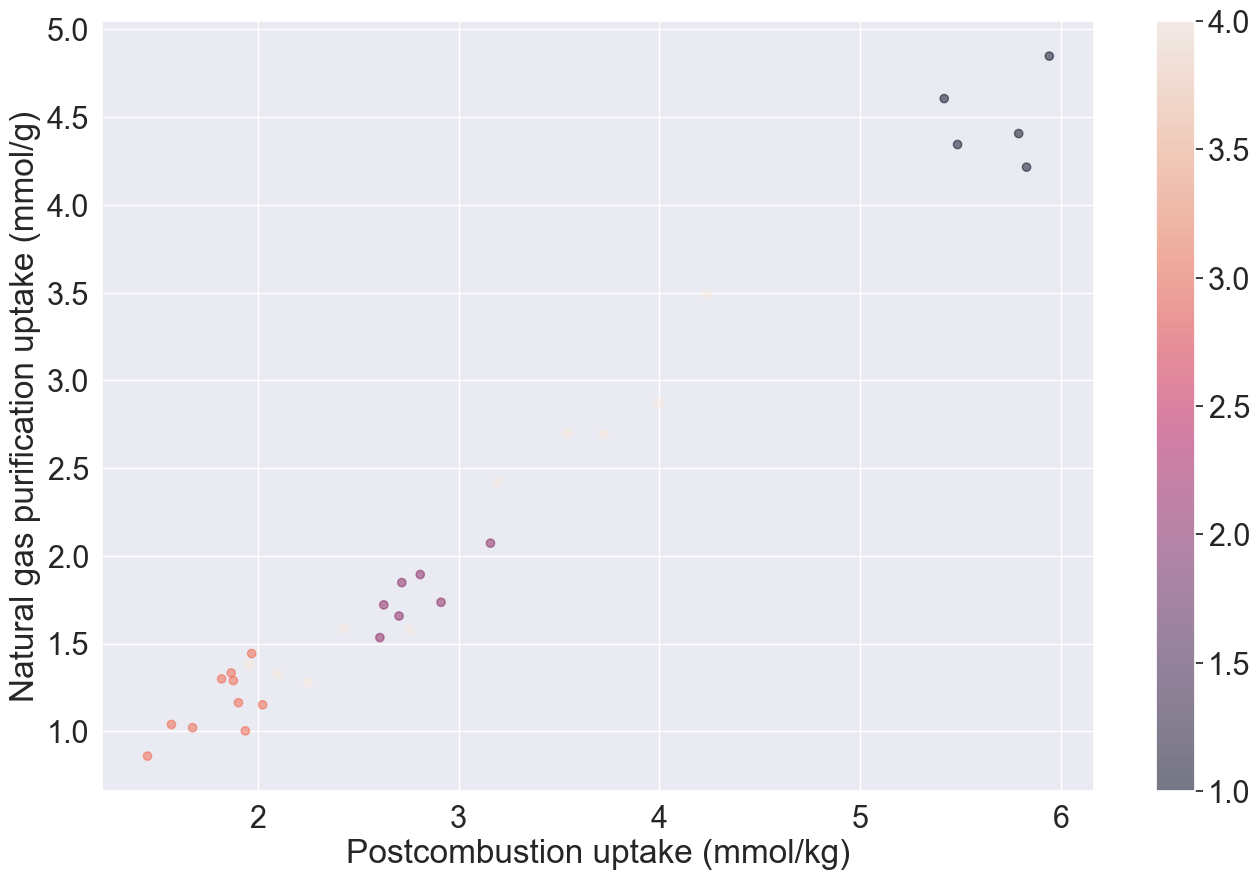

In [470]:
plt.figure(figsize=(16,10))
plt.scatter(df_merge_sub["outputs.landfill_gas_vpsa_uptake-mmol/g"], df_merge_sub["outputs.natural_gas_purification_uptake-mmol/g"], c=df_merge_sub["class"], alpha=.5)
plt.xlabel("Postcombustion uptake (mmol/kg)")
plt.ylabel("Natural gas purification uptake (mmol/g)")
plt.colorbar()

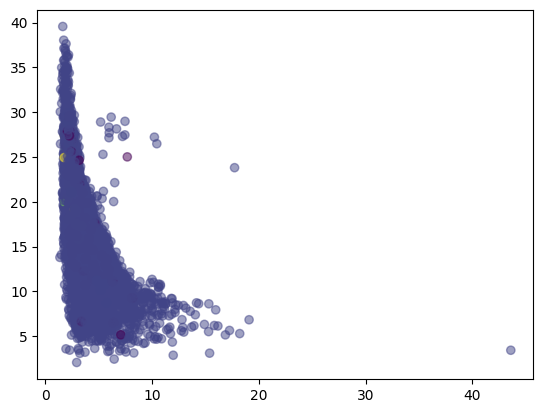

In [110]:
plt.scatter(df_merge["outputs.landfill_gas_vpsa_selectivity-"], df_merge["outputs.methane_storage_psa_uptake-mmol/g"], c=df_merge["class"], alpha=.5)

# Multi-label classfication

In [18]:
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef

In [11]:
df_ori_label = pd.read_csv("../data/arc-merge.csv")
output_keys = ["info.name"] + [key for key in df_ori_label if ("outputs" in key) and ("uptake" in key) and ("mmol/g" in key)]
df_ori_label = df_ori_label[output_keys]

In [29]:
df_label = df_ori_label[["info.name"]]
for key in df_ori_label:
    if "outputs" in key:
        label = re.split('\.|_', key)[1]
        df_label.loc[:, label] = pd.Series(pd.qcut(df_ori_label[key], q=[0,0.8,1], labels=[0,1]).values, dtype=object)

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_10075/950366187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.loc[:, label] = pd.Series(pd.qcut(df_ori_label[key], q=[0,0.8,1], labels=[0,1]).values, dtype=object)
/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_10075/950366187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.loc[:, label] = pd.Series(pd.qcut(df_ori_label[key], q=[0,0.8,1], labels=[0,1]).values, dtype=object)
/var/folders/gt/tsyp2wjd1ng0pkr1tf52

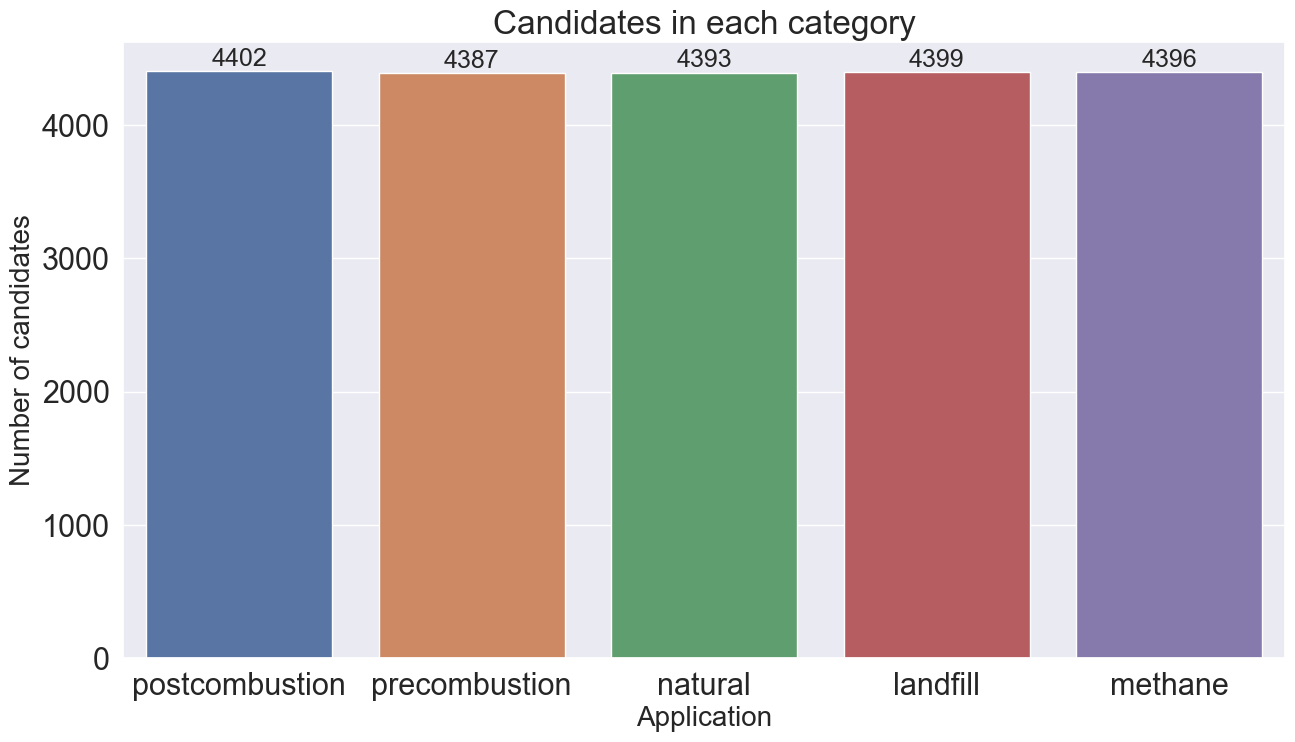

In [30]:
categories = list(df_label.columns.values[1:])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(x=categories, y=df_label.iloc[:,1:].sum().values)
plt.title("Candidates in each category", fontsize=24)
plt.ylabel('Number of candidates', fontsize=20)
plt.xlabel('Application', fontsize=20)
#adding the text labels
rects = ax.patches
labels = df_label.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

In [31]:
#df_emb.rename(columns={"type": "info.name"}, inplace=True)
df_for_cls = df_emb.merge(df_label, on="info.name")

In [32]:
df_train, df_test = train_test_split(df_for_cls, test_size=.2, random_state=1727, shuffle=True)

In [33]:
x_train = df_train.values[:,1:1001].astype('float')
y_train = df_train.values[:, 1001:].astype('int')

x_test = df_test.values[:,1:1001].astype('float')
y_test = df_test.values[:, 1001:].astype('int')

In [34]:
x_train = normalize(x_train)
x_test = normalize(x_test)

In [359]:
categories

['postcombustion', 'precombustion', 'natural', 'landfill', 'methane']

### OneVsRest

In [35]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('** Processing {} ... **'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, df_train[category].astype('int').values)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(df_test[category].astype('int').values, prediction)))
    print('Test coeff is {}'.format(matthews_corrcoef(df_test[category].astype('int').values, prediction)))
    print("\n")

** Processing postcombustion ... **
Test accuracy is 0.8445654640344906
Test coeff is 0.44176810565030006


** Processing precombustion ... **
Test accuracy is 0.8345813478556842
Test coeff is 0.4211935966421144


** Processing natural ... **
Test accuracy is 0.8304969366916269
Test coeff is 0.3889834138353124


** Processing landfill ... **
Test accuracy is 0.8336737009303381
Test coeff is 0.395647775722116


** Processing methane ... **
Test accuracy is 0.8795098706603132
Test coeff is 0.5965602679604702




(0.0, 1.0)

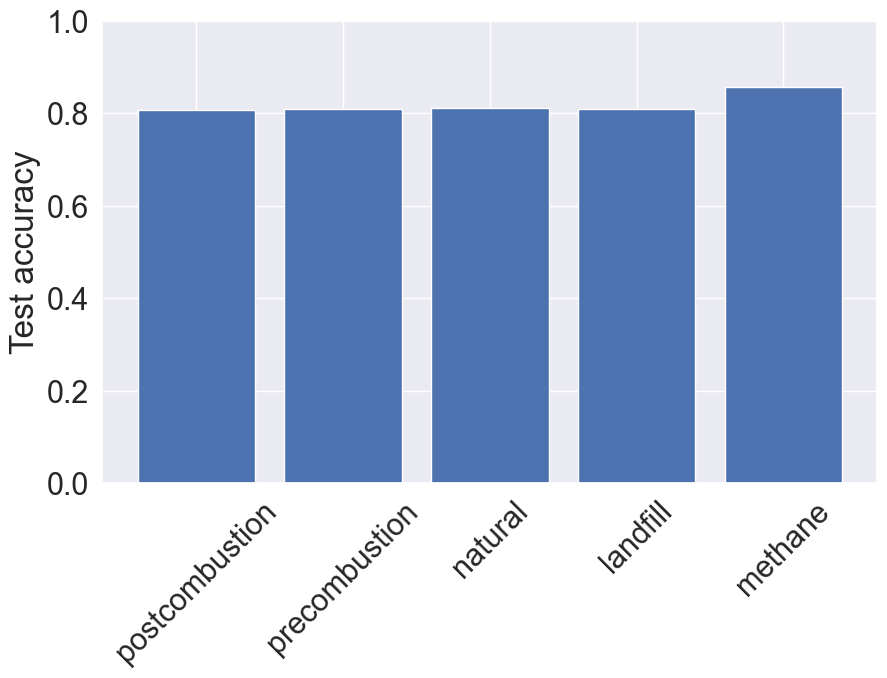

In [443]:
plt.figure(figsize=(10,6))
plt.bar([0,1,2,3,4], [0.8080326752893124, 0.8093941456773315, 0.8121170864533697, 0.810528704334014, 0.8574994327206716])
plt.xticks([0,1,2,3,4], labels=categories, rotation=45)
plt.ylabel("Test accuracy")
plt.ylim([0,1])

In [362]:
from sklearn.svm import SVC

In [366]:
clf = SVC(random_state=79)
clf.fit(x_train, y_train[:, -1])
predictions = clf.predict(x_test)

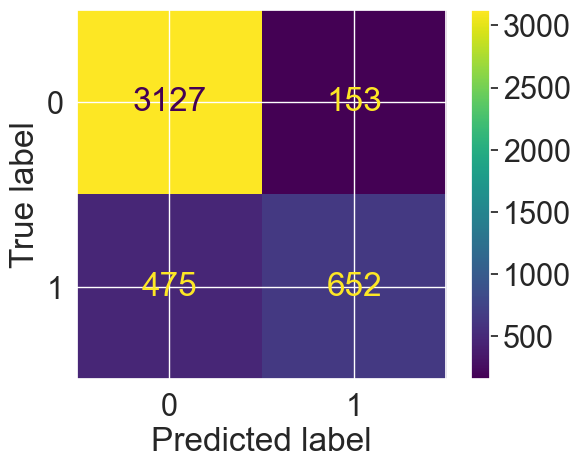

In [444]:
cm = confusion_matrix(y_test[:,-1], prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

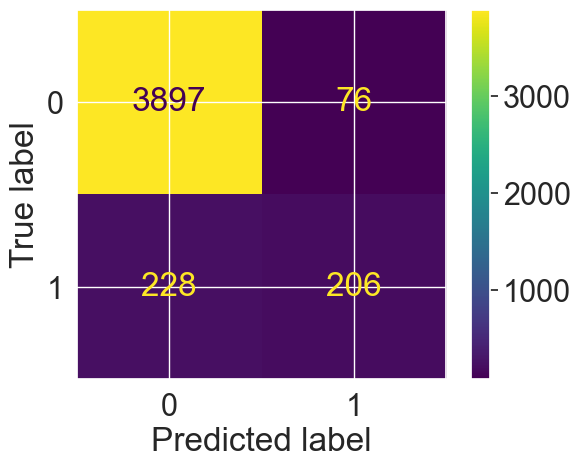

In [361]:
cm = confusion_matrix(df_test[category].astype('int').values, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Binary Relevance

In [315]:
y_train[:,0]

array([0, 0, 0, ..., 0, 0, 1], dtype=object)

In [321]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.17177218062173816


## Classifier chains

In [1]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

NameError: name 'x_train' is not defined

## Label Powerset

In [323]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


Accuracy =  0.7145450419786703




/Users/xiaoqi/opt/miniconda3/envs/mofgraph2vec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Adapted Algorithm

In [324]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ", accuracy_score(y_test,predictions_new))
print("\n")

TypeError: __init__() takes 1 positional argument but 2 were given